In [ ]:
!pip install pefile

     |████████████████████████████████| 72 kB 354 kB/s 
  Created wheel for pefile: filename=pefile-2021.9.3-py3-none-any.whl size=68844 sha256=6aa1c4bdcc26c62a0600cff79dc5a18cedd9f4a616659ea170dfd83b6b47b5ac
  Stored in directory: /root/.cache/pip/wheels/50/be/9b/d19a6151b9c6e303f823faedf03193d7e90dac4009a0bdafeb
Successfully built pefile


Question-3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [ ]:
# define function for calculating false positive rate
def false_positive_rate(cm):
  FP = (cm.sum(axis=0) - np.diag(cm))[0]  
  FN = (cm.sum(axis=0) - np.diag(cm))[1] 
  TP = np.diag(cm)[1]
  TN = np.diag(cm)[0]
  return FP/(FP+TN)

In [ ]:
# import data in the csv file
data = pd.read_csv('/content/drive/MyDrive/datasets/Assignments/features.csv')
data.head()

,Machine,NumberOfSections,NumberOfSymbols,TimeDateStamp,Characteristics,SizeOfOptionalHeader,Magic,AddressOfEntryPoint,CheckSum,DllCharacteristics,...,garray,realaudioobjects_tlb,bpl,tmenuitem,fch,qqrv,de1gdzjfw0,vrhx,fp7f,fileCategory
0,332,3,0,1208111602,271,224,267,25619,166732,32768,...,0,0,0,0,0,0,0,0,0,0
1,332,10,0,1405441342,8450,224,267,4138,670278,0,...,0,0,0,0,0,0,0,0,0,0
2,332,3,0,1208111618,271,224,267,85420,250152,32768,...,0,0,0,0,0,0,0,0,0,0
3,332,4,48,1405441237,8966,224,267,42,35920,0,...,0,0,0,0,0,0,0,0,0,0
4,332,3,0,1208113177,271,224,267,8175,19646,32768,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print('Total number of samples  : {}'.format(len(data)))
print('Total number of features : {}'.format(len(data.iloc[0,:])-1))

Total number of samples  : 797
Total number of features : 75


## Feature Selection by Decision Tree feature importance

In [ ]:
# define X and y and split data into train and test
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# instantiate decision tree classifier
clf = DecisionTreeClassifier(random_state=0)

#fit model and predict with test data
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(f'Accuracy              :{accuracy_score(y_test,y_pred)}')
print(f'F1 Score              :{f1_score(y_test,y_pred)}')

Accuracy              :0.9875
F1 Score              :0.9866666666666666


(0.0, 0.2)

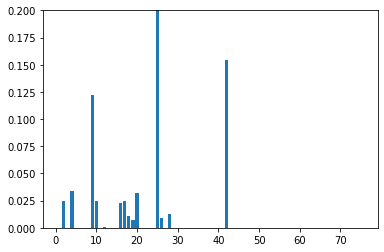

In [ ]:
# retrive feature importance and plot it 
importance = clf.feature_importances_
features = list(data.columns)
x = range(1, len(X.iloc[0,:])+1)
plt.bar(x,importance)
plt.ylim(0,0.2)

### Selecting features by seting threshold for importance = 0.01

In [ ]:
new_features1 = []
for feature, imp in zip(features, importance):
  if imp > 0.01:
    new_features1.append(feature)
new_features1

['NumberOfSections',
 'TimeDateStamp',
 'CheckSum',
 'DllCharacteristics',
 'SizeOfImage',
 'SizeOfInitializedData',
 'SizeOfStackCommit',
 'SizeOfUninitializedData',
 'MajorImageVersion',
 'MinorLinkerVersion',
 'msvbvm60']

In [ ]:
# train with new features and calculate accuracy with test data
X = data.loc[:,new_features1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(f'Accuracy              :{accuracy_score(y_test,y_pred)}')
print(f'F1 Score              :{f1_score(y_test,y_pred)}')

Accuracy              :0.9875
F1 Score              :0.9866666666666666


### Selecting features by seting threshold for importance = 0.03

In [ ]:
new_features2 = []
for feature, imp in zip(features, importance):
  if imp > 0.03:
    new_features2.append(feature)
print(new_features2)

['TimeDateStamp', 'CheckSum', 'SizeOfUninitializedData', 'MajorImageVersion', 'msvbvm60']


In [ ]:
# train with new features and calculate accuracy with test data
X = data.loc[:,new_features2]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(f'Accuracy              :{accuracy_score(y_test,y_pred)}')
print(f'F1 Score              :{f1_score(y_test,y_pred)}')

Accuracy              :0.9708333333333333
F1 Score              :0.9688888888888889


### Selecting features by seting threshold for importance = 0.05

In [ ]:
new_features3 = []
for feature, imp in zip(features, importance):
  if imp > 0.05:
    new_features3.append(feature)
print(new_features3)

['CheckSum', 'MajorImageVersion', 'msvbvm60']


In [ ]:
# train with new features and calculate accuracy with test data
X = data.loc[:,new_features3]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(f'Accuracy              :{accuracy_score(y_test,y_pred)}')
print(f'F1 Score              :{f1_score(y_test,y_pred)}')

Accuracy              :0.9291666666666667
F1 Score              :0.9237668161434978


No much change in accuracy when threshold set to 0.01, list new_feature1 gives best features

## Classification with best features

In [ ]:
# best features when threshold set to 0.01
for f in new_features1:
  print(f)

NumberOfSections
TimeDateStamp
CheckSum
DllCharacteristics
SizeOfImage
SizeOfInitializedData
SizeOfStackCommit
SizeOfUninitializedData
MajorImageVersion
MinorLinkerVersion
msvbvm60


Decision Tree Classifier

In [ ]:
X = data.loc[:,new_features1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf1 = DecisionTreeClassifier(random_state=1)
clf1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

Accuracy              :1.0
F1 Score              :1.0
Precision             :1.0
Recall                :1.0
False Positive Rate   :0.0

Confusion Matrix
----------------


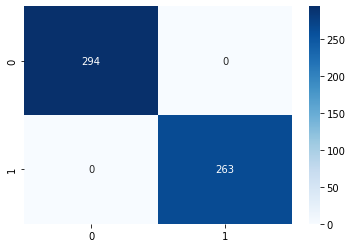

In [ ]:
# performance for training data
y_pred = clf1.predict(X_train)

cm = confusion_matrix(y_train,y_pred)
print(f'Accuracy              :{accuracy_score(y_train,y_pred)}')
print(f'F1 Score              :{f1_score(y_train,y_pred)}')
print(f'Precision             :{precision_score(y_train,y_pred)}')
print(f'Recall                :{recall_score(y_train,y_pred)}')
print(f'False Positive Rate   :{false_positive_rate(cm)}')
print('\nConfusion Matrix\n----------------')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

Accuracy              :0.9791666666666666
F1 Score              :0.9779735682819383
Precision             :0.9823008849557522
Recall                :0.9736842105263158
False Positive Rate   :0.023622047244094488

Confusion Matrix
----------------


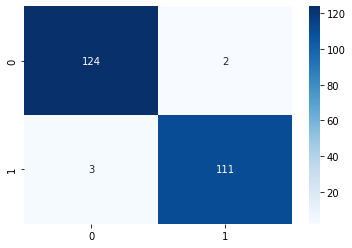

In [ ]:
# performance for test data
y_pred = clf1.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print(f'Accuracy              :{accuracy_score(y_test,y_pred)}')
print(f'F1 Score              :{f1_score(y_test,y_pred)}')
print(f'Precision             :{precision_score(y_test,y_pred)}')
print(f'Recall                :{recall_score(y_test,y_pred)}')
print(f'False Positive Rate   :{false_positive_rate(cm)}')
print('\nConfusion Matrix\n----------------')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

Random Forest Classifier

In [ ]:
X = data.loc[:,new_features1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf2 = RandomForestClassifier(random_state=1)
clf2.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

Accuracy              :1.0
F1 Score              :1.0
Precision             :1.0
Recall                :1.0
False Positive Rate   :0.0

Confusion Matrix
----------------


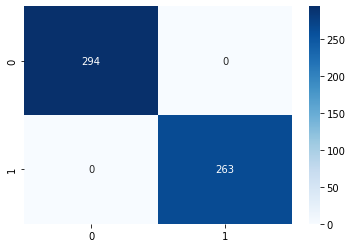

In [ ]:
# performance for training data
y_pred = clf2.predict(X_train)

cm = confusion_matrix(y_train,y_pred)
print(f'Accuracy              :{accuracy_score(y_train,y_pred)}')
print(f'F1 Score              :{f1_score(y_train,y_pred)}')
print(f'Precision             :{precision_score(y_train,y_pred)}')
print(f'Recall                :{recall_score(y_train,y_pred)}')
print(f'False Positive Rate   :{false_positive_rate(cm)}')
print('\nConfusion Matrix\n----------------')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

Accuracy              :0.9875
F1 Score              :0.9867841409691629
Precision             :0.9911504424778761
Recall                :0.9824561403508771
False Positive Rate   :0.015748031496062992

Confusion Matrix
----------------


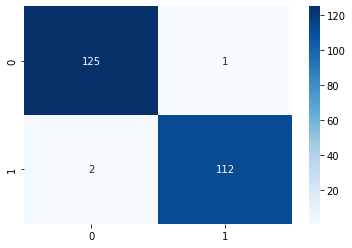

In [ ]:
# peformance for test data
y_pred = clf2.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(f'Accuracy              :{accuracy_score(y_test,y_pred)}')
print(f'F1 Score              :{f1_score(y_test,y_pred)}')
print(f'Precision             :{precision_score(y_test,y_pred)}')
print(f'Recall                :{recall_score(y_test,y_pred)}')
print(f'False Positive Rate   :{false_positive_rate(cm)}')
print('\nConfusion Matrix\n----------------')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

Random Forest classifier gives better performance:
- Accuracy              :98.75%
- F1 Score              :98.67%
- Precision             :99.11%
- Recall                :98.24%
- False Positive Rate   :01.57%

Important Features:

Static PE_features:
1. NumberOfSections
2. TimeDateStamp
3. CheckSum
4. DllCharacteristics
5. SizeOfImage
6. SizeOfInitializedData
7. SizeOfStackCommit
8. SizeOfUninitializedData
8. MajorImageVersion
10. MinorLinkerVersion

String feature:
11. msvbvm60
